In [ ]:
import cv2
import numpy as np
import pandas as pd
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
from huggingface_hub import login

# =========================
# 1️⃣ Login to Hugging Face (For Colab)
# =========================
login()  # Enter your Hugging Face token when prompted

# =========================
# 2️⃣ Load Product Information from Excel
# =========================
excel_path = "/content/trail1.xlsx"  # Update this path
df = pd.read_excel(excel_path)  # Read the Excel file

# Assuming we need only the first row (for one product)
product_id = df.iloc[0]["id"]
product_name = df.iloc[0]["productDisplayName"]
category = df.iloc[0]["masterCategory"]
sub_category = df.iloc[0]["subCategory"]
article_type = df.iloc[0]["articleType"]
base_color = df.iloc[0]["baseColour"]
season = df.iloc[0]["season"]
usage = df.iloc[0]["usage"]

# Define background color (can be user-defined)
background_color = "pink background with a modern ad design"

# =========================
# 3️⃣ Load Product Image & Create Mask
# =========================
image_path = f"/content/{product_id}.jpg"  # Match the image using the ID
image = cv2.imread(image_path)

# Convert to grayscale and create a mask
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Save the mask
mask_path = "/content/mask.jpg"
cv2.imwrite(mask_path, mask)

# Convert OpenCV image to PIL format
product_image = Image.open(image_path).convert("RGB")
mask_image = Image.open(mask_path).convert("L")

# =========================
# 4️⃣ Load Stable Diffusion Inpainting Model
# =========================
device = "cuda" if torch.cuda.is_available() else "cpu"

try:
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        "runwayml/stable-diffusion-inpainting",
        torch_dtype=torch.float16
    ).to(device)
except:
    print("❌ Error loading 'runwayml/stable-diffusion-inpainting'. Trying alternative model...")
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-inpainting",
        torch_dtype=torch.float16
    ).to(device)

# Define the AI prompt for generating the ad
prompt = (f"A professional ad featuring {product_name}, a {base_color} "
          f"{article_type} for {usage}. Ideal for {season} season. "
          f"Designed in a {background_color}.")

# Generate the ad with inpainting
output_image = pipe(prompt=prompt, image=product_image, mask_image=mask_image).images[0]

# =========================
# 5️⃣ Save & Display the Ad Image
# =========================
ad_output_path = "/content/generated_ad.jpg"
output_image.save(ad_output_path)

print(f"✅ Ad successfully generated: {ad_output_path}")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

❌ Error loading 'runwayml/stable-diffusion-inpainting'. Trying alternative model...


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

✅ Ad successfully generated: /content/generated_ad.jpg


In [1]:
!pip install diffusers transformers accelerate controlnet_aux torch
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [2]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch
from PIL import Image
import cv2
import numpy as np

# Load ControlNet model
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_canny", torch_dtype=torch.float16
)

# Load Stable Diffusion pipeline with ControlNet
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
).to("cuda")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
def canny_edge_detection(image_path):
    image = Image.open(image_path).convert("RGB")
    image = np.array(image)
    edges = cv2.Canny(image, 100, 200)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)  # Convert to 3-channel
    return Image.fromarray(edges)

# Preprocess the uploaded image
image_path = "/content/1551.jpg"
control_image = canny_edge_detection(image_path)
control_image.show()


In [4]:
rm -rf ~/.cache/huggingface/hub


In [5]:
from diffusers import StableDiffusionInpaintPipeline
import torch

pipe_inpaint = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=False  # Forces it to use .bin files
).to("cuda")


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

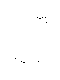

In [17]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load product image
product_id = "1551"  # Replace with actual product ID
image_path = f"/content/{product_id}.jpg"
image = cv2.imread(image_path)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to create a binary mask (adjust threshold value as needed)
_, mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)

# Save mask
mask_path = "/content/mask.jpg"
cv2.imwrite(mask_path, mask)

# Convert OpenCV image to PIL format for Stable Diffusion
product_image = Image.open(image_path).convert("RGB")
mask_image = Image.open(mask_path).convert("L")

# Display the mask using cv2_imshow and wait for a key press
cv2_imshow(mask) # Use cv2_imshow instead of cv2.imshow

# Remove the problematic lines
# cv2.waitKey(0)
# cv2.destroyAllWindows()

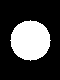

In [4]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

# Load image
image_path = "/content/1551.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use adaptive thresholding to handle lighting variations
mask = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 10
)

# Apply morphological operations to close gaps
kernel = np.ones((7, 7), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# Optional: Use a circular mask for better results
h, w = mask.shape
center = (w // 2, h // 2)
radius = min(w, h) // 2 - 10
circular_mask = np.zeros_like(mask)
cv2.circle(circular_mask, center, radius, 255, thickness=-1)

# Apply circular mask to refine the result
mask = cv2.bitwise_and(mask, circular_mask)

# Save and display mask
mask_path = "/content/fixed_mask.jpg"
cv2.imwrite(mask_path, mask)
cv2_imshow(mask)

# Convert for Stable Diffusion
product_image = Image.open(image_path).convert("RGB")
mask_image = Image.open(mask_path).convert("L")


In [5]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import cv2
import numpy as np


# **Load Stable Diffusion Inpainting Model**
pipe_inpaint = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16
).to("cuda")

# **Premium Advertisement Prompt**
prompt = (
    "A high-end studio advertisement of a premium sports ball. "
    "Glossy finish, dramatic lighting, realistic shadows, ultra-HD, "
    "placed on a clean, luxury backdrop with soft reflections. "
    "Professional commercial ad, designed for branding."
)

# **Run Inpainting**
result = pipe_inpaint(
    prompt=prompt,
    image=product_image,
    mask_image=mask_image,
    num_inference_steps=80,
    guidance_scale=7.5,  # Reduce over-shaping
)

# **Save and Display Output**
generated_ad = result.images[0]
generated_ad.save("/content/generated_ad.png")
generated_ad.show()



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

In [18]:
prompt = "A high-quality advertisement featuring a premium sports ball, elegant background, dynamic lighting, and a modern, professional design."

result = pipe_inpaint(
    prompt=prompt,
    image=product_image,
    mask_image=mask_image,
    num_inference_steps=50
)

# Save and show the generated ad
generated_ad = result.images[0]
generated_ad.save("generated_ad.png")
generated_ad.show()


  0%|          | 0/50 [00:00<?, ?it/s]

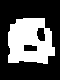

In [15]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

# Load image
product_id = "1551"
image_path = f"/content/{product_id}.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Adaptive thresholding for better mask creation
mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY_INV, 11, 2)

# Morphological operations to clean the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Save and display mask
mask_path = "/content/fixed_mask.jpg"
cv2.imwrite(mask_path, mask)
cv2_imshow(mask)


In [16]:
prompt = "A high-quality sports advertisement featuring a well-lit sports ball on a modern studio background."

result = pipe_inpaint(
    prompt=prompt,
    image=product_image,
    mask_image=mask_image,
    num_inference_steps=50,
    generator=torch.manual_seed(42)  # Change 42 to a different number if needed
)


# Save and show the generated ad
generated_ad = result.images[0]
generated_ad.save("/content/generated_ad.png")
generated_ad.show()


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


In [6]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Load Stable Diffusion Text-to-Image Model
pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16)
pipe.to("cuda")

# Generate background
prompt = (
    "A high-end sports advertisement background, luxury, dramatic lighting, glossy finish, cinematic effect, "
    "realistic shadows, premium ad style, ultra-HD."
)

background_result = pipe(prompt, num_inference_steps=50, guidance_scale=7.5)
generated_background = background_result.images[0]

# Save generated background
generated_background.save("/content/fancy_ad_background.png")
generated_background.show()


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

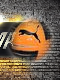

In [10]:
import cv2
import numpy as np

# Load images
ball_image_path = "/content/1551.jpg"
mask_image_path = "/content/fixed_mask.jpg"
background_image_path = "/content/fancy_ad_background.png"

ball_image = cv2.imread(ball_image_path)
mask = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
background = cv2.imread(background_image_path)

# Resize background to match ball image
background = cv2.resize(background, (ball_image.shape[1], ball_image.shape[0]))

# Convert mask to binary & smoothen it
_, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
mask = cv2.GaussianBlur(mask, (15, 15), 10)  # Smooth transition

# Invert mask for blending
alpha = mask.astype(float) / 255

# Convert images to float for better blending
ball_float = ball_image.astype(float)
background_float = background.astype(float)

# Blend ball & background smoothly
final_ad = (ball_float * alpha[:, :, None]) + (background_float * (1 - alpha[:, :, None]))
final_ad = final_ad.astype(np.uint8)  # Convert back to uint8

# Save & show result
cv2.imwrite("/content/final_ad.png", final_ad)

from google.colab.patches import cv2_imshow
cv2_imshow(final_ad)  # Display image in Colab


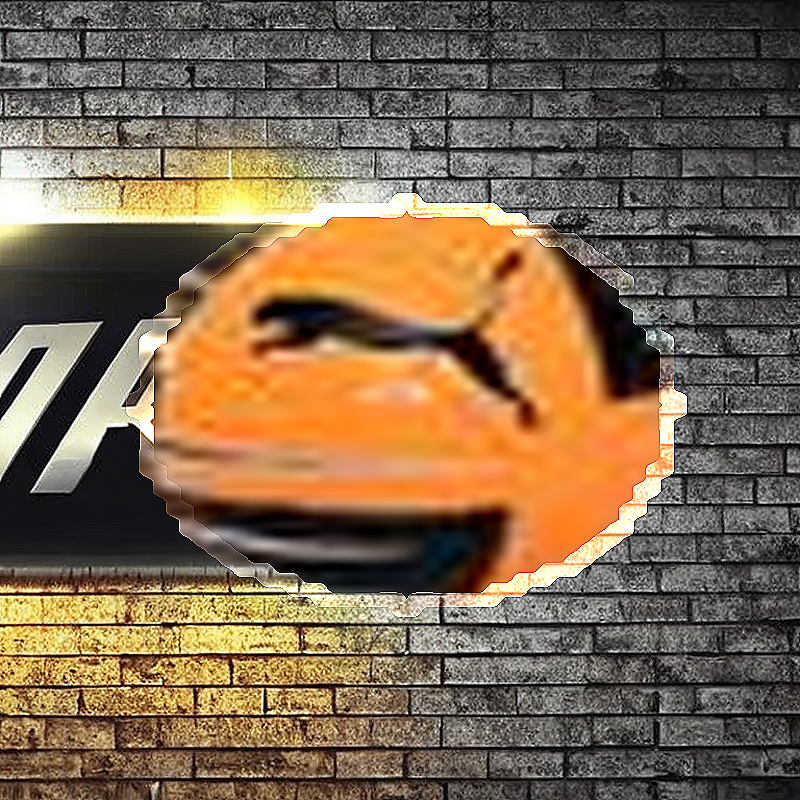

In [12]:
import cv2
import numpy as np

# Load images
ball_image_path = "/content/1551.jpg"  # Product image
mask_image_path = "/content/fixed_mask.jpg"  # Mask
background_image_path = "/content/fancy_ad_background.png"  # AI-generated background

ball_image = cv2.imread(ball_image_path, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)
background = cv2.imread(background_image_path)

# Increase resolution if images are small
target_size = (800, 800)  # Adjust as needed
ball_image = cv2.resize(ball_image, target_size, interpolation=cv2.INTER_CUBIC)
mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_CUBIC)
background = cv2.resize(background, target_size, interpolation=cv2.INTER_CUBIC)

# Convert mask to binary format and smooth edges
_, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
mask = cv2.GaussianBlur(mask, (15, 15), 10)

# Invert mask
mask_inv = cv2.bitwise_not(mask)

# Extract object region and background
ball_region = cv2.bitwise_and(ball_image, ball_image, mask=mask)
background_region = cv2.bitwise_and(background, background, mask=mask_inv)

# Combine images
final_ad = cv2.add(ball_region, background_region)

# Sharpen image
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
final_ad = cv2.filter2D(final_ad, -1, sharpening_kernel)

# Save and display final result
cv2.imwrite("/content/final_ad_1.png", final_ad)
from google.colab.patches import cv2_imshow
cv2_imshow(final_ad)  # Display image in Colab


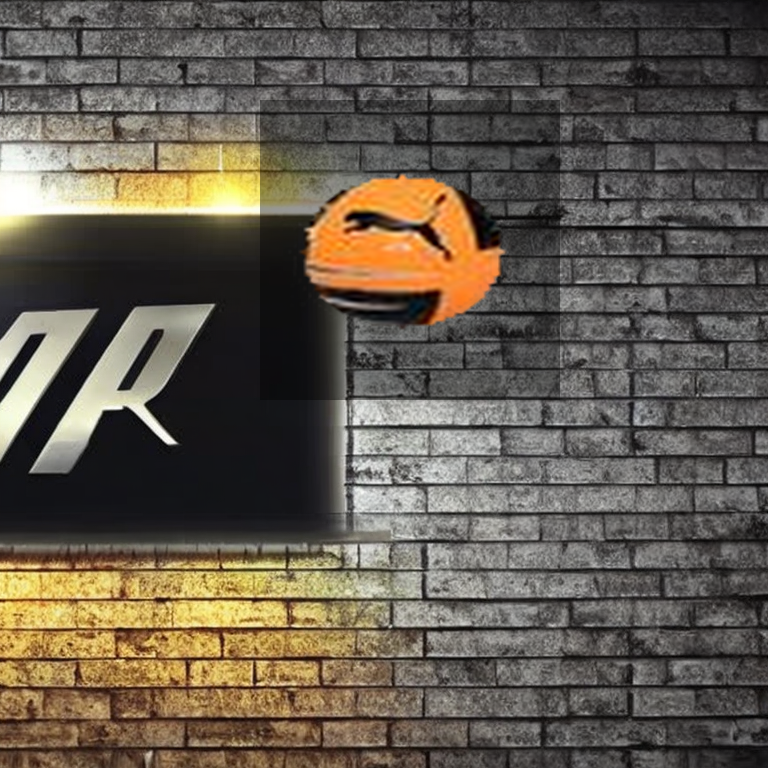

In [13]:
import cv2
import numpy as np

# Load images
ball_image = cv2.imread("/content/1551.jpg", cv2.IMREAD_UNCHANGED)
mask = cv2.imread("/content/fixed_mask.jpg", cv2.IMREAD_GRAYSCALE)
background = cv2.imread("/content/fancy_ad_background.png")

# Resize with better interpolation
target_size = (300, 300)  # Adjust as needed
ball_image = cv2.resize(ball_image, target_size, interpolation=cv2.INTER_LANCZOS4)
mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_LANCZOS4)

# Create a shadow by shifting the mask and blurring
shadow = cv2.GaussianBlur(mask, (35, 35), 20)
shadow = cv2.cvtColor(shadow, cv2.COLOR_GRAY2BGR)  # Convert to color

# Make shadow dark
shadow[:, :, :] = (0, 0, 0)

# Define new position for ball (e.g., right side)
x_offset, y_offset = 250, 100  # Adjust based on preference

# Blend shadow first
background[y_offset:y_offset+target_size[1], x_offset+10:x_offset+10+target_size[0]] = cv2.addWeighted(
    background[y_offset:y_offset+target_size[1], x_offset+10:x_offset+10+target_size[0]],
    0.6, shadow, 0.4, 0
)

# Apply ball image on top
for c in range(3):  # Blend each color channel
    background[y_offset:y_offset+target_size[1], x_offset:x_offset+target_size[0], c] = (
        ball_image[:, :, c] * (mask / 255.0) +
        background[y_offset:y_offset+target_size[1], x_offset:x_offset+target_size[0], c] * (1 - mask / 255.0)
    )

# Save and display final result
cv2.imwrite("/content/final_ad_fixed.png", background)
from google.colab.patches import cv2_imshow
cv2_imshow(background)


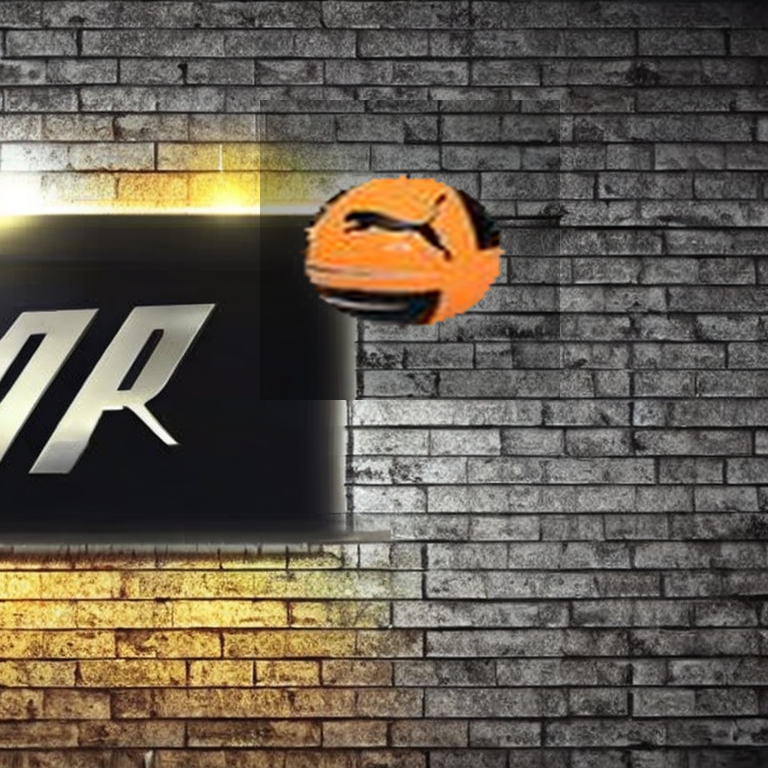

In [15]:
import cv2
import numpy as np

# Load images
ball_image = cv2.imread("/content/1551.jpg", cv2.IMREAD_UNCHANGED)
mask = cv2.imread("/content/fixed_mask.jpg", cv2.IMREAD_GRAYSCALE)
background = cv2.imread("/content/fancy_ad_background.png")

# Resize images for consistency
target_size = (300, 300)  # Adjust as needed
ball_image = cv2.resize(ball_image, target_size, interpolation=cv2.INTER_LANCZOS4)
mask = cv2.resize(mask, target_size, interpolation=cv2.INTER_LANCZOS4)

# Convert mask to float32 for better blending
mask = mask.astype(np.float32) / 255.0  # Normalize mask

# Create a soft shadow by shifting and blurring
shadow = cv2.GaussianBlur(mask * 255, (55, 55), 25)  # Bigger blur
shadow = cv2.cvtColor(shadow.astype(np.uint8), cv2.COLOR_GRAY2BGR)  # Convert to 3-channel

# Reduce shadow intensity
shadow = (shadow * 0.3).astype(np.uint8)  # Make it 30% visible

# Define placement offsets
x_offset, y_offset = 250, 100  # Adjust as needed

# Ensure proper blending without overwriting background
bg_subsection = background[y_offset:y_offset+target_size[1], x_offset:x_offset+target_size[0]]

# Blend shadow onto background
background[y_offset:y_offset+target_size[1], x_offset+10:x_offset+10+target_size[0]] = cv2.addWeighted(
    bg_subsection, 0.7, shadow, 0.3, 0  # Adjust transparency
)

# Blend the product into the background smoothly
for c in range(3):  # Blend each color channel
    bg_subsection[:, :, c] = (
        ball_image[:, :, c] * mask + bg_subsection[:, :, c] * (1 - mask)
    )

# Replace blended section in background
background[y_offset:y_offset+target_size[1], x_offset:x_offset+target_size[0]] = bg_subsection

# Save and display final result
cv2.imwrite("/content/final_ad_fixed.png", background)

# Show result in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(background)


In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import numpy as np
import cv2

# Load background and mask
bg_path = "/content/fancy_ad_background.png"
mask_path = "/content/fixed_mask.jpg"

background = Image.open(bg_path).convert("RGB")
mask = Image.open(mask_path).convert("L")  # Convert to grayscale

# Resize mask to match background
mask = mask.resize(background.size)

# Load Stable Diffusion inpainting pipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
).to("cuda")  # Use GPU for faster generation

# Define text prompt
prompt = "A high-quality advertisement featuring an orange sports ball seamlessly blended into a stylish, futuristic urban background with realistic shadows and lighting."

# Generate the inpainted image
inpainted_image = pipe(prompt=prompt, image=background, mask_image=mask).images[0]

# Save and display result
inpainted_image.save("/content/final_ad_inpainted.png")
inpainted_image.show()


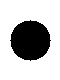

In [16]:
import cv2
import numpy as np

# Load mask
mask = cv2.imread("/content/fixed_mask.jpg", cv2.IMREAD_GRAYSCALE)

# Invert mask
mask = cv2.bitwise_not(mask)  # Swap black ↔ white

# Save corrected mask
cv2.imwrite("/content/corrected_mask.jpg", mask)

# Display corrected mask
from google.colab.patches import cv2_imshow
cv2_imshow(mask)


In [31]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image

# Load Stable Diffusion Inpainting pipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")

# Load images
background = Image.open("/content/fancy_ad_background.png").convert("RGB")
mask = Image.open("/content/corrected_mask.jpg").convert("L")
original_ball = Image.open("/content/1551.jpg").convert("RGBA")  # Load original ball

# Generate inpainted image
prompt = "A stylish advertisement with a dynamic lighting effect, realistic shadows"
negative_prompt = "distorted textures, missing objects, blurry areas"

inpainted_image = pipe(
    prompt=prompt,
    image=background,
    mask_image=mask,
    negative_prompt=negative_prompt,
    guidance_scale=7.5,  # Keep balance between realism & prompt adherence
    strength=0.65  # Reduce strength to avoid removing key details
).images[0]

# **Overlay the original ball back**
final_image = inpainted_image.convert("RGBA")
final_image.paste(original_ball, (30, 30), original_ball)  # Adjust position as needed

# Save & display final ad
final_image.save("/content/final_ad_with_ball.png")
final_image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/32 [00:00<?, ?it/s]

In [28]:
from diffusers import StableDiffusionXLImg2ImgPipeline
import torch
from PIL import Image

# Load the SDXL model for image composition
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")

# Load images
background = Image.open("/content/fancy_ad_background.png").convert("RGB")
ball = Image.open("/content/1551.jpg")

# Ensure ball has an alpha channel (Fixes IndexError)
if ball.mode != "RGBA":
    ball = ball.convert("RGBA")

alpha_channel = ball.split()[-1]  # Extract the alpha channel safely

# Merge images without manually adjusting position
merged_input = background.copy()
merged_input.paste(ball, (50, 50), mask=alpha_channel)  # Adjust position if needed

# Generate the final ad with automatic placement
prompt = "A stylish advertisement for a sports ball, perfectly placed with natural lighting and shadows"
negative_prompt = "blurry, distorted objects, unnatural positioning"

final_ad = pipe(
    prompt=prompt,
    image=merged_input,
    strength=0.7,  # Adjust strength for better integration
    negative_prompt=negative_prompt
).images[0]

# Save & display final ad
final_ad.save("/content/final_ad_auto.png")
final_ad.show()


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Background generated successfully!


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/30 [00:00<?, ?it/s]

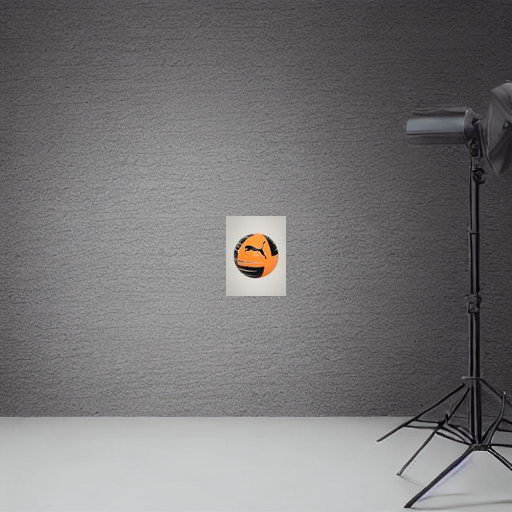

Final ad created successfully!


In [2]:
from diffusers import StableDiffusionPipeline, StableDiffusionInpaintPipeline
import torch
from PIL import Image, ImageDraw

# Step 1: Use Standard Stable Diffusion instead of SDXL to avoid the error
base_model = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",  # Using standard SD 1.5 which doesn't require text_embeds
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")

# Generate the ad background
background_prompt = "Premium advertising background, professional studio photography, elegant commercial backdrop, minimalist product showcase, soft gradient lighting, high-end advertisement"
negative_background_prompt = "cluttered, text, logos, watermarks, people, crowded, busy design"

# Set a specific seed for reproducibility
generator = torch.Generator(device="cuda" if torch.cuda.is_available() else "cpu").manual_seed(1234)

# Generate the background
background_image = base_model(
    prompt=background_prompt,
    negative_prompt=negative_background_prompt,
    height=512,
    width=512,
    num_inference_steps=50,
    generator=generator
).images[0]

# Save the generated background
background_image.save("/content/generated_background.png")
print("Background generated successfully!")

# Step 2: Load the product image
product_image = Image.open("/content/1551.jpg").convert("RGBA")

# Resize product image if needed (optional)
# If your product image is too large or small, uncomment and adjust this code:
# max_size = 200  # Maximum width or height
# ratio = min(max_size / product_image.width, max_size / product_image.height)
# new_size = (int(product_image.width * ratio), int(product_image.height * ratio))
# product_image = product_image.resize(new_size, Image.LANCZOS)

# Step 3: Create a mask for where the product will be placed
mask = Image.new("L", background_image.size, 0)  # Black mask (0)
product_position = (
    (background_image.width - product_image.width) // 2,
    (background_image.height - product_image.height) // 2
)

# Draw a white rectangle (255) in the mask where the product will be placed
# Making it slightly larger than the product for better blending
padding = 20
mask_draw_area = [
    product_position[0] - padding,
    product_position[1] - padding,
    product_position[0] + product_image.width + padding,
    product_position[1] + product_image.height + padding
]
draw = ImageDraw.Draw(mask)
draw.rectangle(mask_draw_area, fill=255)  # White rectangle

# Save the mask for reference
mask.save("/content/product_mask.png")

# Step 4: Apply inpainting to create a realistic integration area
inpaint_model = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",  # Using standard inpainting model
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")

# Prepare the inpainting prompt to create a suitable area for the product
inpaint_prompt = "Product placement area with realistic shadow, studio lighting, professional product display, seamless integration"
negative_inpaint_prompt = "distorted surfaces, unrealistic lighting, discontinuity"

# Inpaint the placement area
inpainted_background = inpaint_model(
    prompt=inpaint_prompt,
    image=background_image,
    mask_image=mask,
    negative_prompt=negative_inpaint_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    generator=generator
).images[0]

# Save the prepared background
inpainted_background.save("/content/inpainted_background.png")

# Step 5: Composite the final image
final_image = inpainted_background.convert("RGBA")
final_image.paste(product_image, product_position, product_image)

# Save and display the final ad
final_image.save("/content/final_ad.png")
from IPython.display import display
display(final_image)
print("Final ad created successfully!")



**under this section i tried to create bg,create a small area in it for inlay,and inlay the extracted product image**











In [1]:
from diffusers import StableDiffusionPipeline, StableDiffusionInpaintPipeline
import torch
from PIL import Image, ImageDraw

# Check device availability
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the background generation model
base_model = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to(device)

# Load the inpainting model for product integration
inpaint_model = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to(device)

print("Models loaded successfully!")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Models loaded successfully!


In [22]:
background_prompt = "black background,sports theme"
negative_prompt = "dark, high contrast, human figures, text, logos, cluttered elements"

# Generate background
background_image = base_model(
    prompt=background_prompt,
    negative_prompt=negative_prompt,
    height=512,
    width=512,
    num_inference_steps=50,
    generator=generator
).images[0]

# Save background image
background_image.save("generated_background.png")
print("Refined simple background generated successfully!")


  0%|          | 0/50 [00:00<?, ?it/s]

Refined simple background generated successfully!


In [10]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00


In [13]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.0 MB/s eta 0:00:00


In [14]:
from diffusers import StableDiffusionPipeline, StableDiffusionInpaintPipeline
import torch
from PIL import Image, ImageDraw
import numpy as np
from rembg import remove

Product extracted from background!


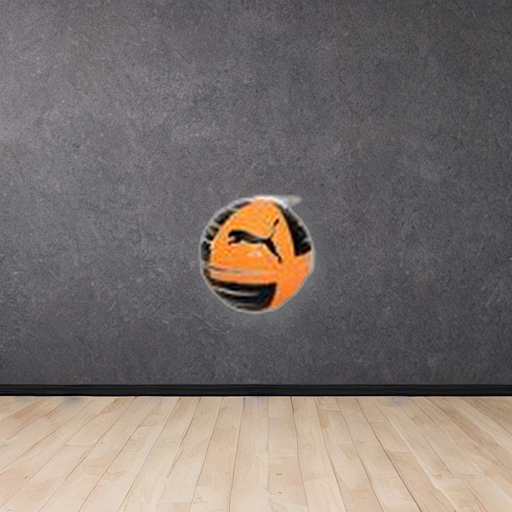

Final ad created successfully!


In [25]:
product_with_bg = Image.open("/content/1551.jpg").convert("RGB")

# Remove background from product image
product_no_bg = remove(product_with_bg)  # This gives RGBA with transparent background
product_no_bg.save("/content/product_extracted.png")
print("Product extracted from background!")
scale_factor = 2.5
new_width = int(product_no_bg.width * scale_factor)
new_height = int(product_no_bg.height * scale_factor)
product_no_bg = product_no_bg.resize((new_width, new_height), Image.LANCZOS)

# Step 3: Create a shadow for the product (optional but adds realism)
def create_shadow(product_image, blur_radius=10, opacity=0.5):
    # Create a black silhouette from the alpha channel
    shadow = Image.new("RGBA", product_image.size, (0, 0, 0, 0))
    shadow_draw = ImageDraw.Draw(shadow)

    # Get mask from alpha channel
    mask = product_image.split()[3]

    # Fill the shadow with black based on the mask
    shadow_pixels = shadow.load()
    mask_pixels = mask.load()

    for y in range(shadow.height):
        for x in range(shadow.width):
            if mask_pixels[x, y] > 0:
                shadow_pixels[x, y] = (0, 0, 0, int(mask_pixels[x, y] * opacity))

    # Apply blur to the shadow
    from PIL import ImageFilter
    shadow = shadow.filter(ImageFilter.GaussianBlur(radius=blur_radius))

    return shadow

# Create the shadow
product_shadow = create_shadow(product_no_bg)
product_shadow.save("/content/product_shadow.png")

# Step 4: Calculate the position for the product
# Centered position
product_position = (
    (background_image.width - product_no_bg.width) // 2,
    (background_image.height - product_no_bg.height) // 2
)

# Step 5: Composite everything together
final_image = background_image.convert("RGBA")

# First place the shadow (slightly offset)
shadow_position = (product_position[0] + 5, product_position[1] + 5)  # Offset shadow a bit
final_image.paste(product_shadow, shadow_position, product_shadow)

# Then place the product
final_image.paste(product_no_bg, product_position, product_no_bg)

# Save and display the final ad
final_image.save("/content/final_ad_with_shadow.png")
from IPython.display import display
display(final_image)
print("Final ad created successfully!")

**experimenting with dynamic placement n all**


Product extracted from background!


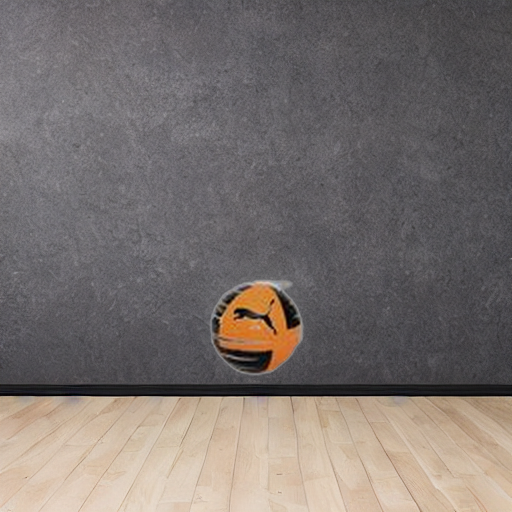

Final ad created successfully!


In [27]:
from PIL import ImageStat
product_with_bg = Image.open("/content/1551.jpg").convert("RGB")

# Remove background from product image
product_no_bg = remove(product_with_bg)  # This gives RGBA with transparent background
product_no_bg.save("/content/product_extracted.png")
print("Product extracted from background!")
import numpy as np
from PIL import Image, ImageFilter, ImageEnhance
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101

def place_object_realistically(background, product, scale_factor=1.0):
    # 1. Resize the product based on scale factor
    new_width = int(product.width * scale_factor)
    new_height = int(product.height * scale_factor)
    product_resized = product.resize((new_width, new_height), Image.LANCZOS)

    # 2. Detect the floor/surface in the background
    floor_y = detect_surface(background)

    # 3. Calculate appropriate position
    x_position = (background.width - product_resized.width) // 2
    y_position = floor_y - product_resized.height

    # 4. Create realistic shadow
    shadow = create_dynamic_shadow(product_resized, background, floor_y)

    # 5. Apply lighting adjustments to match scene
    product_adjusted = match_lighting(product_resized, background, x_position, y_position)

    # 6. Composite everything
    final_image = background.copy().convert("RGBA")

    # Place shadow
    shadow_position = (x_position, floor_y - shadow.height)
    final_image.paste(shadow, shadow_position, shadow)

    # Place product
    final_image.paste(product_adjusted, (x_position, y_position), product_adjusted)

    return final_image

def detect_surface(background):
    """Detect the floor or surface in an image using a pre-trained segmentation model"""
    # Load segmentation model
    model = deeplabv3_resnet101(pretrained=True).eval()

    # Prepare image for model
    transform = T.Compose([
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = transform(background)
    input_batch = input_tensor.unsqueeze(0)

    # Run model
    with torch.no_grad():
        output = model(input_batch)['out'][0]

    # Get segmentation map (15 is the label for "floor" in COCO)
    floor_mask = output.argmax(0) == 15

    # Find the highest point of the floor
    if floor_mask.any():
        floor_indices = floor_mask.nonzero()
        if len(floor_indices) > 0:
            # Get top-most floor pixel
            floor_y = floor_indices[:, 0].min().item()
            return floor_y

    # Fallback if no floor detected - assume bottom 20% is floor
    return int(background.height * 0.8)

def create_dynamic_shadow(product, background, floor_y):
    """Create a shadow that adapts to the background lighting conditions"""
    # Extract alpha channel for shape
    if product.mode == 'RGBA':
        alpha = product.split()[3]
    else:
        # Create alpha based on non-white pixels if no alpha channel
        alpha = Image.new('L', product.size, 0)
        temp = product.convert('L')
        alpha_data = alpha.load()
        temp_data = temp.load()
        for y in range(product.height):
            for x in range(product.width):
                if temp_data[x, y] < 240:  # Non-white pixels
                    alpha_data[x, y] = 255

    # Create base shadow
    shadow = Image.new("RGBA", product.size, (0, 0, 0, 0))
    shadow_pixels = shadow.load()
    alpha_pixels = alpha.load()

    # Determine shadow opacity based on background brightness
    background_brightness = ImageEnhance.Brightness(background).enhance(1.0).convert('L').getpixel((background.width//2, floor_y))
    shadow_opacity = max(0.3, min(0.7, 1.0 - (background_brightness / 255)))

    # Fill shadow
    for y in range(shadow.height):
        for x in range(shadow.width):
            if alpha_pixels[x, y] > 0:
                # Make shadow more transparent toward edges
                distance_from_center = abs(x - shadow.width//2) / (shadow.width//2)
                local_opacity = shadow_opacity * (1 - distance_from_center * 0.5)
                shadow_pixels[x, y] = (0, 0, 0, int(alpha_pixels[x, y] * local_opacity))

    # Apply perspective transform to shadow (make it wider at the bottom)
    shadow = shadow.transform(
        shadow.size,
        Image.AFFINE,
        (1, 0, 0, 0.2, 1, 0),  # Slight shear
        resample=Image.BICUBIC
    )

    # Blur the shadow based on light conditions
    # More diffuse lighting = more blur
    blur_radius = max(5, min(20, 20 - (background_brightness / 255) * 10))
    shadow = shadow.filter(ImageFilter.GaussianBlur(radius=blur_radius))

    return shadow

def match_lighting(product, background, x_pos, y_pos):
    """Adjust product lighting to match the background scene"""
    # Sample background lighting around the product placement area
    sample_size = 100
    sample_x = max(0, min(background.width - sample_size, x_pos))
    sample_y = max(0, min(background.height - sample_size, y_pos))

    bg_sample = background.crop((sample_x, sample_y, sample_x + sample_size, sample_y + sample_size))

    # Analyze background lighting
    bg_brightness = ImageStat.Stat(bg_sample.convert('L')).mean[0] / 255.0
    bg_contrast = ImageStat.Stat(bg_sample.convert('L')).stddev[0] / 128.0

    # Get dominant color for tinting
    bg_colors = bg_sample.convert('RGB').getcolors(sample_size * sample_size)
    if bg_colors:
        dominant_color = max(bg_colors, key=lambda x: x[0])[1]
        r, g, b = dominant_color
        tint_color = (r/255, g/255, b/255)
    else:
        tint_color = (1, 1, 1)  # Neutral

    # Apply adjustments
    product_adjusted = product.copy()

    # Brightness adjustment
    brightness_factor = 0.8 + bg_brightness * 0.4  # Map 0-1 to 0.8-1.2
    product_adjusted = ImageEnhance.Brightness(product_adjusted).enhance(brightness_factor)

    # Contrast adjustment
    contrast_factor = 0.9 + bg_contrast * 0.2  # Map to 0.9-1.1
    product_adjusted = ImageEnhance.Contrast(product_adjusted).enhance(contrast_factor)

    # Color tint to match scene
    r_adjust, g_adjust, b_adjust = tint_color
    r_factor, g_factor, b_factor = 0.9 + r_adjust * 0.2, 0.9 + g_adjust * 0.2, 0.9 + b_adjust * 0.2

    r, g, b, a = product_adjusted.split()
    r = ImageEnhance.Brightness(r).enhance(r_factor)
    g = ImageEnhance.Brightness(g).enhance(g_factor)
    b = ImageEnhance.Brightness(b).enhance(b_factor)

    product_adjusted = Image.merge('RGBA', (r, g, b, a))

    return product_adjusted
final_image = place_object_realistically(
    background=background_image,
    product=product_no_bg,
    scale_factor=2.0  # Adjust scale factor as needed
)

# Save and display the final ad (keep this part)
final_image.save("/content/final_ad_with_shadow.png")
from IPython.display import display
display(final_image)
print("Final ad created successfully!")
